### graphviz와 mlxtend로 확인하는 Iris 분류

In [27]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [28]:
from sklearn.model_selection import train_test_split

features = iris.data[:, 2:]
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=13)

In [29]:
# 훈련용/테스트용 잘 분리되었는지 검증
import numpy as np
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([ 9,  8, 13]))

In [30]:
# stratify
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,
                 stratify=labels, random_state=13)
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

In [31]:
from sklearn.tree import DecisionTreeClassifier
iris_tree = DecisionTreeClassifier(max_depth=4, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [32]:
from sklearn.metrics import accuracy_score
y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.975

graphviz로 결정나무 모형 확인하기

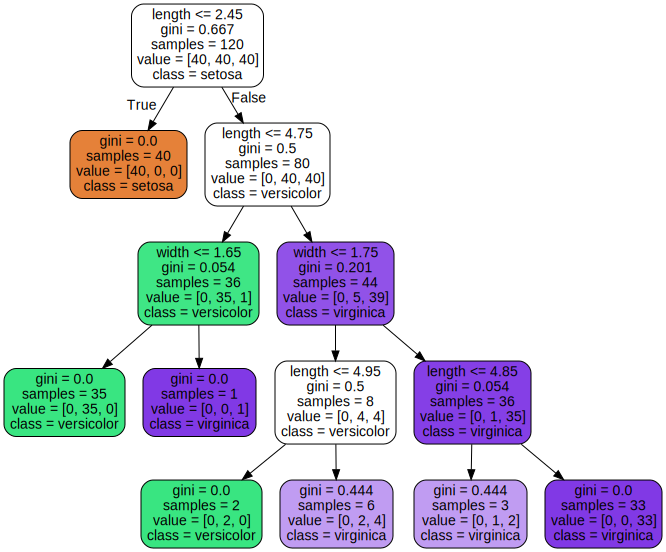

In [33]:
from graphviz import Source
from sklearn.tree import export_graphviz

ex = export_graphviz(iris_tree, feature_names=['length', 'width'], class_names=iris.target_names,
               rounded=True, filled=True)
Source(ex)

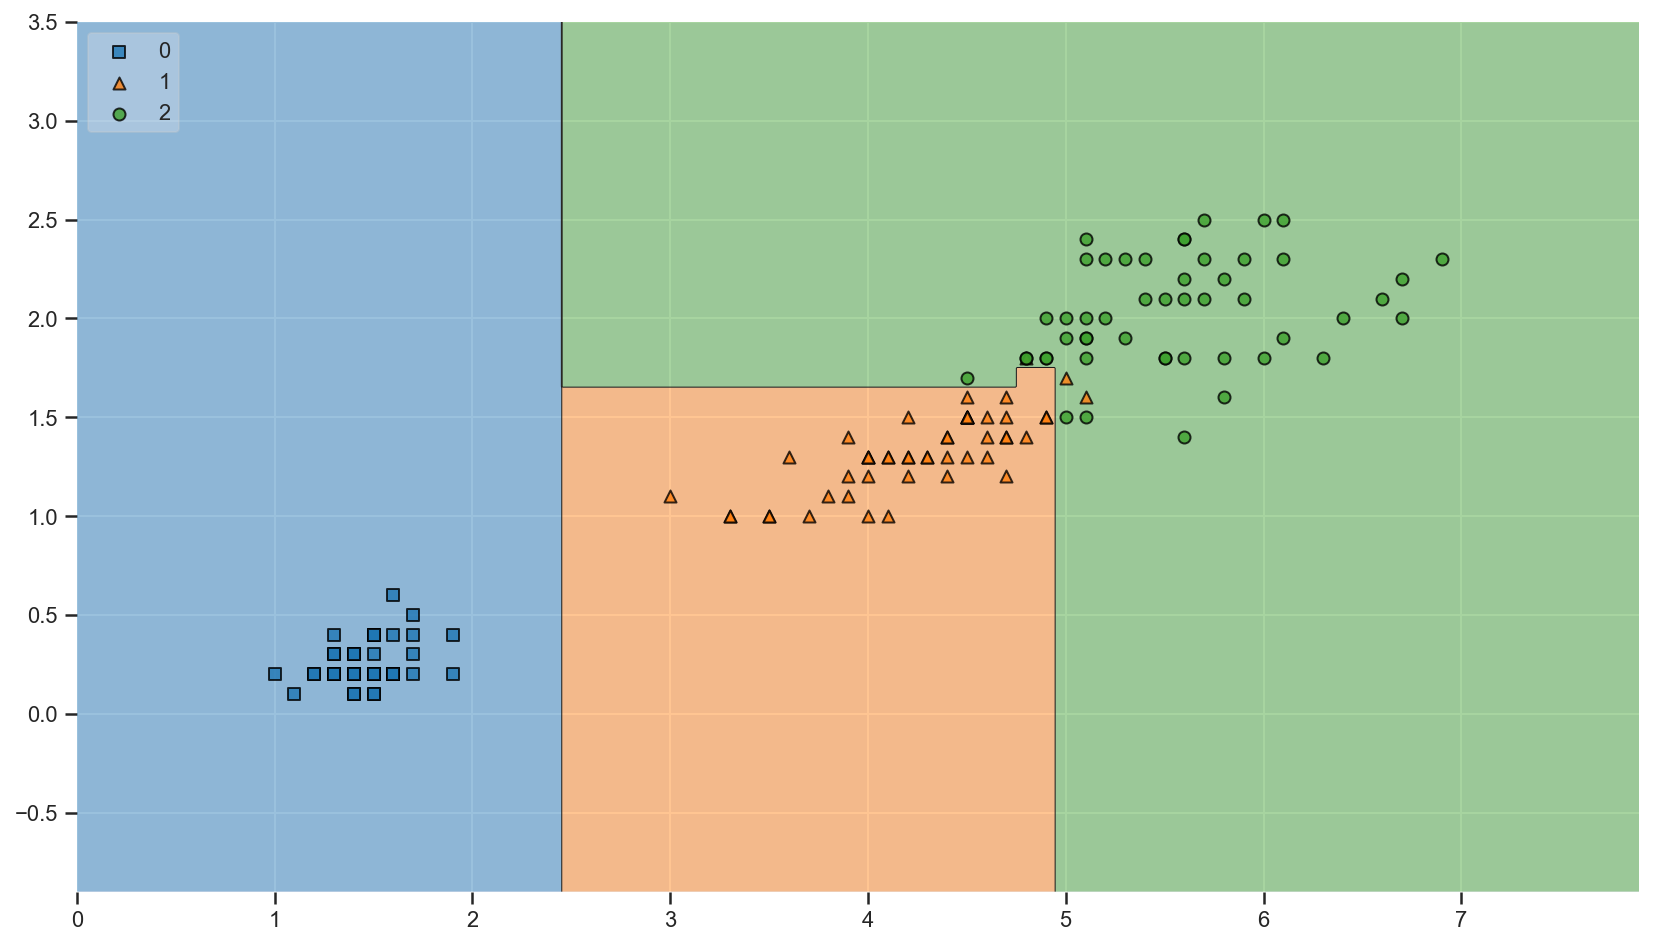

In [34]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(14,8))
plot_decision_regions(X=iris.data[:, 2:], y=iris.target, clf=iris_tree, legend=2)
plt.show()

- 과적합이 우려됨

### 다시 해보기

In [36]:
# max_depth=2 로 재조정

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.95

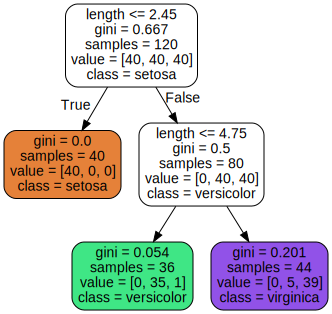

In [38]:
Source(export_graphviz(iris_tree, feature_names=['length', 'width'], class_names=iris.target_names,
                      rounded=True, filled=True))

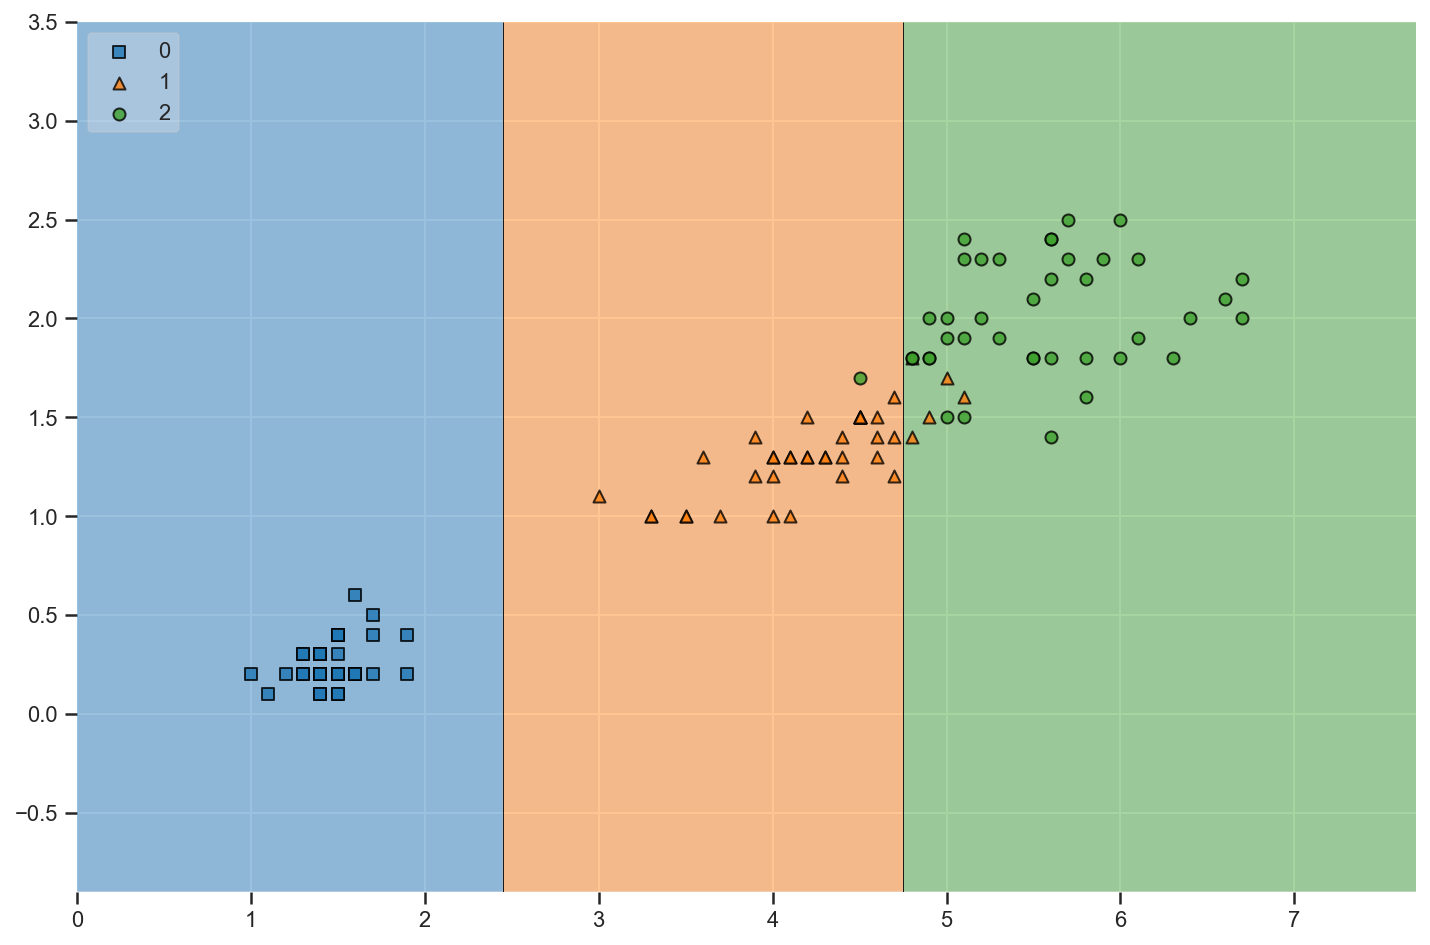

In [43]:
plt.figure(figsize=(12,8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
# legend -> 범례 위치
plt.show()

In [40]:
X_train

array([[4.5, 1.7],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.6, 0.2],
       [6.7, 2. ],
       [4.8, 1.8],
       [1.9, 0.2],
       [5.5, 2.1],
       [4.6, 1.5],
       [4.9, 1.5],
       [5.1, 1.5],
       [1.7, 0.5],
       [4.2, 1.3],
       [1.4, 0.2],
       [4.4, 1.2],
       [4.9, 1.8],
       [5.2, 2. ],
       [1.4, 0.2],
       [1.4, 0.2],
       [1.4, 0.2],
       [5.7, 2.3],
       [4.1, 1.3],
       [5.6, 2.2],
       [4.8, 1.8],
       [1.2, 0.2],
       [4.7, 1.2],
       [4. , 1.2],
       [1.5, 0.2],
       [4.3, 1.3],
       [5.1, 2.4],
       [3.3, 1. ],
       [6. , 1.8],
       [1.7, 0.2],
       [5.9, 2.3],
       [6.1, 2.3],
       [3.9, 1.2],
       [5.8, 1.6],
       [4. , 1.3],
       [1.3, 0.3],
       [4.5, 1.5],
       [1.3, 0.2],
       [1.6, 0.6],
       [4.2, 1.3],
       [4.3, 1.3],
       [1.4, 0.2],
       [4.9, 2. ],
       [6.3, 1.8],
       [1.5, 0.1],
       [5. , 1.7],
       [6.4, 2. ],
       [4.5, 1.5],
       [1.4, 0.3],
       [4.7,

### 전체 데이터에서 관찰해보기

/Users/jaecheolchoi/opt/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,


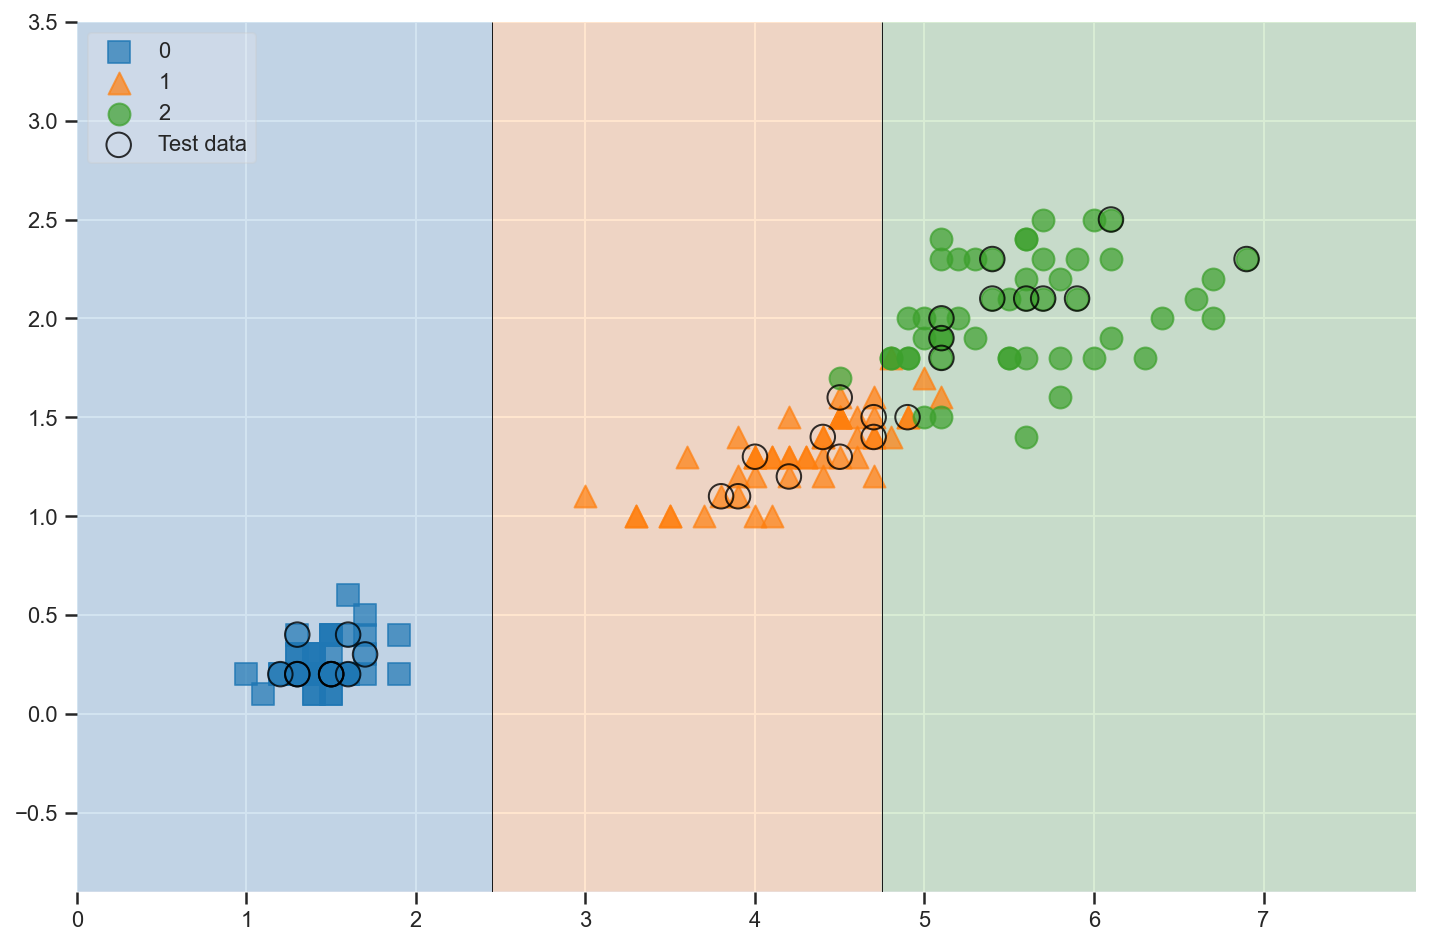

In [54]:
scatter_highlight_kwargs = {'s':150, 'label': 'Test data', 'alpha':0.8}
scatter_kwargs = {'s':120, 'edgecolor':None, 'alpha':0.7}

plt.figure(figsize=(12,8))
plot_decision_regions(X=features, y=labels, X_highlight=X_test, clf=iris_tree, legend=2,
                     scatter_highlight_kwargs=scatter_highlight_kwargs,
                     scatter_kwargs=scatter_kwargs,
                     contourf_kwargs={'alpha':0.2})
plt.show()